In [1]:
import torch
from decoder_net import ImageNet, RangeNet, DataLoaderWrapper
from torch.utils.data import Dataset, DataLoader, TensorDataset
import matplotlib.pyplot as plt
import os
import numpy as np
import pickle
import math

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.cuda.empty_cache()
print('Device: ', device)

load_path = "/home/simon/catkin_ws/src/turtlebot3_gazebo/scripts/data/data_warehouse.pkl"
range_data_loader = DataLoaderWrapper(load_path, type='img')
train_loader = range_data_loader.train_loader
test_loader = range_data_loader.test_loader

net = ImageNet()

# epoch_loss, batch_loss = net.train_net(net, train_loader, device, 2, 150)
# torch.save((epoch_loss, batch_loss), 'office_losses.pt')
net.load_state_dict(torch.load('/home/simon/catkin_ws/src/turtlebot3_gazebo/scripts/trained_conv_nets/img/2.pt'))

Device:  cuda


<All keys matched successfully>

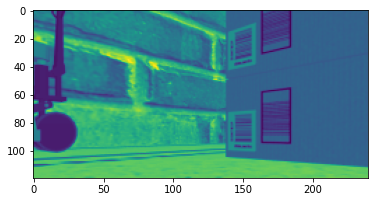

KeyboardInterrupt: Interrupted by user

In [6]:
test_loader = range_data_loader.test_loader

for x in test_loader:
    pose = x[0]
    img_true = x[1]
    img_pred = net(x[0].cpu())

    
    plt.imshow(img_true.squeeze())
    plt.imshow(torch.squeeze(img_pred.cpu()).detach().numpy())

    plt.show()
    input('-')

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.cuda.empty_cache()
print('Device: ', device)

load_path = "/home/simon/catkin_ws/src/turtlebot3_gazebo/scripts/data/data_warehouse.pkl"
range_data_loader = DataLoaderWrapper(load_path, type='rng')
train_loader = range_data_loader.train_loader
test_loader = range_data_loader.test_loader

net = RangeNet()

# epoch_loss, batch_loss = net.train_net(net, train_loader, device, 2, 150)
# torch.save((epoch_loss, batch_loss), 'office_losses.pt')
net.load_state_dict(torch.load('/home/simon/catkin_ws/src/turtlebot3_gazebo/scripts/trained_conv_nets/rng/2.pt'))

Device:  cuda


<All keys matched successfully>

In [3]:
def plot_ranges(ranges, pos):
    ranges = ranges.detach().numpy().flatten()
    ranges_x = []
    ranges_y = []
    for i, r in enumerate(ranges):
        ranges_x.append(r * math.cos(math.radians(i + 1)))
        ranges_y.append(r * math.sin(math.radians(i + 1)))
    
    ranges_x = [x + pos[0].item() for x in ranges_x]
    ranges_y = [y + pos[1].item() for y in ranges_y]

    return ranges_x, ranges_y

def unormalize_ranges(ranges, ranges_max, ranges_min):
    return ranges * (ranges_max - ranges_min) + ranges_min

-3.7100000381469727 -6.920000076293945


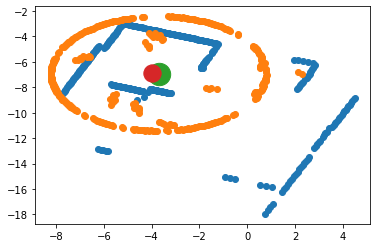

-3.0799999237060547 -6.789999961853027


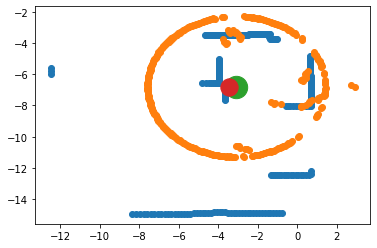

KeyboardInterrupt: Interrupted by user

In [4]:
ranges_max, ranges_min = range_data_loader.get_max_min(range_data_loader.test_data[1])

for x in test_loader:
    pose = x[0]
    rng_true = x[1]
    rng_pred = net(x[0].cpu())

    rng_true_x, rng_true_y = plot_ranges(unormalize_ranges(rng_true.cpu(), ranges_max, ranges_min), pose[0][:2])
    rng_pred_x, rng_pred_y = plot_ranges(unormalize_ranges(rng_pred.cpu(), ranges_max, ranges_min), pose[0][:2])

    x_pred = np.mean(rng_pred_x)
    y_pred = np.mean(rng_pred_y)

    print(pose[0][0].item(), pose[0][1].item())
    plt.scatter(rng_true_x, rng_true_y)
    plt.scatter(rng_pred_x, rng_pred_y)
    plt.scatter(pose[0][0].item(), pose[0][1].item(), s=500)
    plt.scatter(x_pred, y_pred, s=300)

    plt.show()

    input('-')